classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'

day	day of the week: 'mon' to 'sun'

FFMC	FFMC index from the FWI system: 18.7 to 96.20

DMC	DMC index from the FWI system: 1.1 to 291.3

DC	DC index from the FWI system: 7.9 to 860.6

ISI	ISI index from the FWI system: 0.0 to 56.10

temp	temperature in Celsius degrees: 2.2 to 33.30

RH	relative humidity in %: 15.0 to 100

wind	wind speed in km/h: 0.40 to 9.40

rain	outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
forest_df=pd.read_csv("forestfires.csv")
forest_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [2]:
#here I am going to take few columns in forest_df data set
forest_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [3]:
forest_data=forest_df[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain','size_category']]

In [4]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [5]:
#check any null value present in the data set
forest_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
size_category    0
dtype: int64

In [6]:
forest_data["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [7]:
forest_data["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [8]:

forest_data["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  size_category  517 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ KB


In [10]:
forest_data.shape

(517, 11)

In [11]:
# using groupby method to group month columns
g=forest_data.groupby('month')
for month,month_df in g:
    print(month)
    print(month_df)

apr
    month  day  FFMC   DMC    DC   ISI  temp  RH  wind  rain size_category
19    apr  sat  86.3  27.4  97.1   5.1   9.3  44   4.5   0.0         small
176   apr  thu  81.5   9.1  55.2   2.7   5.8  54   5.8   0.0         small
196   apr  thu  81.5   9.1  55.2   2.7   5.8  54   5.8   0.0         large
239   apr  sun  81.9   3.0   7.9   3.5  13.4  75   1.8   0.0         small
240   apr  wed  88.0  17.2  43.5   3.8  15.2  51   2.7   0.0         small
241   apr  fri  83.0  23.3  85.3   2.3  16.7  20   3.1   0.0         small
442   apr  mon  87.9  24.9  41.6   3.7  10.9  64   3.1   0.0         small
469   apr  sun  91.0  14.6  25.6  12.3  13.7  33   9.4   0.0         large
470   apr  sun  91.0  14.6  25.6  12.3  17.6  27   5.8   0.0         small
aug
    month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain size_category
5     aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0         small
6     aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0         small
7     aug  

468   mar  thu  91.3  20.6   43.5   8.5  13.3  27   3.6   0.0         large
may
    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain size_category
304   may  sat  85.1  28.0  113.8  3.5  11.3  94   4.9   0.0         small
471   may  fri  89.6  25.4   73.7  5.7  18.0  40   4.0   0.0         large
nov
    month  day  FFMC  DMC     DC  ISI  temp  RH  wind  rain size_category
516   nov  tue  79.5  3.0  106.7  1.1  11.8  31   4.5   0.0         small
oct
    month  day  FFMC   DMC     DC   ISI  temp  RH  wind  rain size_category
1     oct  tue  90.6  35.4  669.1   6.7  18.0  33   0.9   0.0         small
2     oct  sat  90.6  43.7  686.9   6.7  14.6  33   1.3   0.0         small
17    oct  mon  84.9  32.8  664.2   3.0  16.7  47   4.9   0.0         small
36    oct  tue  90.6  35.4  669.1   6.7  21.7  24   4.5   0.0         small
37    oct  fri  90.0  41.5  682.6   8.7  11.3  60   5.4   0.0         small
38    oct  sat  90.6  43.7  686.9   6.7  17.8  27   4.0   0.0         small
57    o

In [12]:
g.get_group("aug")

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,small
12,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,small
23,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,small
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large


In [13]:
# using groupby method to group size_category columns
g=forest_data.groupby('size_category')
for size,size_df in g:
    print(size)
    print(size_df)

large
    month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain size_category
182   feb  sun  86.8   15.6   48.3   3.9  12.4  53   2.2   0.0         large
183   oct  mon  91.7   48.5  696.1  11.1  16.8  45   4.5   0.0         large
184   aug  fri  93.9  135.7  586.7  15.1  20.8  34   4.9   0.0         large
185   sep  tue  91.0  129.5  692.6   7.0  17.6  46   3.1   0.0         large
186   mar  sun  89.3   51.3  102.2   9.6  11.5  39   5.8   0.0         large
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...           ...
499   aug  tue  96.1  181.1  671.2  14.3  27.3  63   4.9   6.4         large
504   aug  wed  94.5  139.4  689.1  20.0  28.9  29   4.9   0.0         large
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0         large
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0         large
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0         large

[139 rows x 11 columns]
small
    month  day  FFMC    DMC     DC   IS

In [14]:
g.get_group("small")

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
509,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,small
510,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,small
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,small
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


# visualization


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='size_category', ylabel='count'>

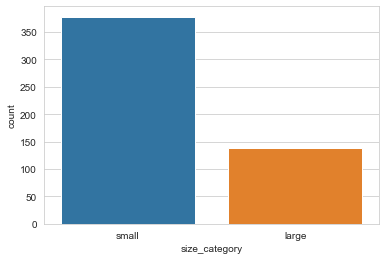

In [16]:
#visualize number of size_category
sns.set_style("whitegrid")
sns.countplot(x="size_category",data=forest_data)

<AxesSubplot:xlabel='month', ylabel='count'>

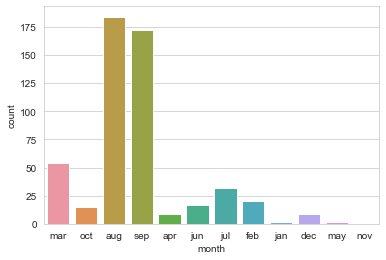

In [17]:
#visualize number of month category
sns.set_style("whitegrid")
sns.countplot(x="month",data=forest_data)

<AxesSubplot:xlabel='month', ylabel='temp'>

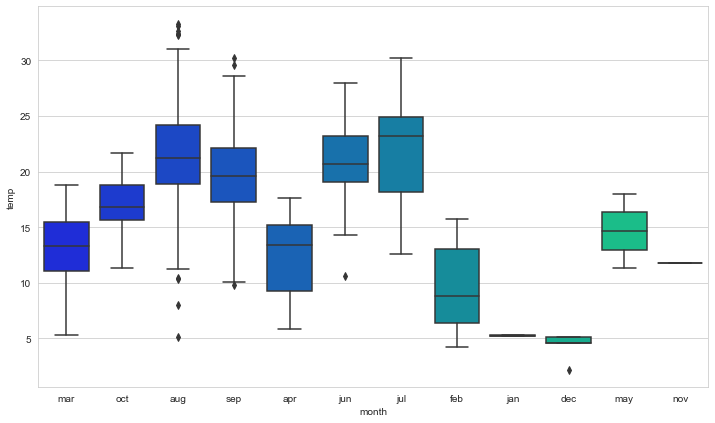

In [18]:
#using box chart to visualize temperature on month  basis using seaborn
plt.figure(figsize=(12,7))
sns.boxplot(x='month',y='temp',data=forest_data,palette='winter')

here we can see that the temperature on month basis. here the month july has showing high temperature, month

december showing low temperature

In [19]:
#rain count in day wise
forest_data.groupby('day').rain.count()

day
fri    85
mon    74
sat    84
sun    95
thu    61
tue    64
wed    54
Name: rain, dtype: int64

C:\Users\sathi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='day'>

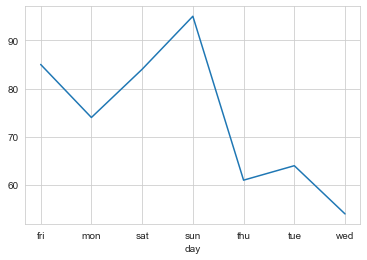

In [20]:
forest_data.groupby('day').rain.count().plot()

<AxesSubplot:xlabel='temp'>

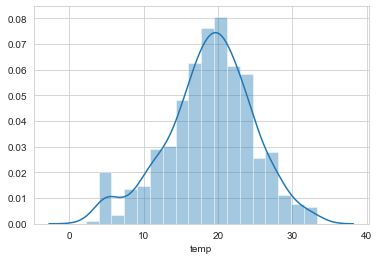

In [21]:
sns.distplot(forest_data["temp"])

here many attributes are in categorical format, so convert it in a numerical form

In [22]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  size_category  517 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ KB


In [23]:
strings=["month","day","size_category"]

In [24]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in strings:
     forest_data[i] = number.fit_transform(forest_data[i])

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [26]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  size_category  517 non-null    int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 38.5 KB


# # Feature Engineering

In [27]:
#here size_category is our target vriable

# Training and splitting the data

In [28]:
forest_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'size_category'],
      dtype='object')

In [29]:
feature_names=['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain']


In [30]:
X = forest_data[feature_names] #Feature
y = forest_data['size_category']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((387, 10), (387,), (130, 10), (130,))

# BUILDING SUPPORT VECTOR MACHINE

In [33]:
from sklearn.svm import SVC # "Support Vector Classifier" 
model = SVC(kernel='linear')

In [34]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [35]:
#prediction
prediction=model.predict(X_test)
prediction  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
#check the accuracy

accuracy= round(model.score(X_train, y_train) * 100, 2) 
accuracy

73.64

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[ 0, 37],
       [ 0, 93]], dtype=int64)

# HYPER PARAMETER TUNING

In [39]:
#from sklearn.model_selection import GridSearchCV

In [42]:
#param={'kernel':('linear','poly','rbf','sigmoid'),

       #  'C':[1,52,10],'degree':[3,8],'coef0':[0.001,10,0.5],'gamma':('auto','scale')}

In [ ]:
#svm_grids=GridSearchCV(model,param,cv=5)

In [ ]:
#svm_grids.fit(X_train,y_train)

In [ ]:
#try different kernal to improve the model accuracy

In [45]:
 #Kernel = poly
model2 = SVC(kernel = 'poly')
model2.fit(X_train,y_train)


SVC(kernel='poly')

In [46]:
#prediction
pred2=model2.predict(X_test)
pred2 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
#check the accuracy

accuracy= round(model2.score(X_train, y_train) * 100, 2) 
accuracy

75.71

In [48]:
# kernel = rbf
model3 = SVC(kernel = 'rbf')
model3.fit(X_train,y_train)

SVC()

In [49]:
#prediction
pred3=model3.predict(X_test)
pred3 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
#check the accuracy

accuracy= round(model3.score(X_train, y_train) * 100, 2) 
accuracy

74.42

In [51]:
# kernel = sigmoid
model4 = SVC(kernel = 'sigmoid')
model4.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [52]:
#prediction
pred4=model4.predict(X_test)
pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
#check the accuracy

accuracy= round(model4.score(X_train, y_train) * 100, 2) 
accuracy

73.39

In [65]:
#try different parameter to improve the accuracy of a model
model5=SVC(kernel='poly',gamma="scale",degree=8,C=1)
model5.fit(X_train,y_train)

SVC(C=1, degree=8, kernel='poly')

In [66]:
#prediction
pred5=model5.predict(X_test)
pred5

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [67]:
#check the accuracy

accuracy= round(model5.score(X_train, y_train) * 100, 2) 
accuracy

93.54

In [ ]:
here we got better accuracy

In [91]:
X_test.shape

(130, 10)

In [70]:
pred5.shape

(130,)

In [92]:
#create a dataframe that contains actual and predicted data


In [100]:
pred_data=pd.DataFrame(pred5)
final_data=pd.concat([forest_data[["size_category"]],pred_data],axis=1)
final_data.columns=["actual_data","predicted_data"]
final_data.head(20)

,actual_data,predicted_data
0,1,1.0
1,1,1.0
2,1,0.0
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,1,1.0
8,1,1.0
9,1,1.0
